In [25]:
import numpy as np 
import torch
import matplotlib.pylab as plt 

from torch import pi
from torch.fft import fft, fftshift, ifft, ifftshift

def fftx(x):
    return fftshift(fft(x, norm = 'ortho', dim = -1), dim = -1)

def ifftx(x):
    return ifft(ifftshift(x, dim = -1), norm = 'ortho', dim = -1)

def weighted_angle(x, threshold = 1e-6):
    abs_mask_x = torch.abs(x) >= threshold
    return abs_mask_x * torch.angle(x)

def theretical_response(periods, freq_grid, N_samples, init_phase, eps = 1e-6 ):
    amplitudes = torch.sin(pi * (periods - freq_grid + eps)) / torch.sin(pi * (periods - freq_grid + eps) / N_samples )
    phases = torch.exp(1j * (pi * (periods - freq_grid) - pi*(periods - freq_grid) / N_samples + init_phase))
    return amplitudes * phases

def plot_re_im(x):
    plt.figure(figsize = (15, 3))
    plt.plot(torch.real(x), '-o', label = 'real')
    plt.plot(torch.imag(x), '-o', label = 'imag')
    plt.grid()
    plt.legend(fontsize = 13)
    plt.title('Signal samples', fontsize = 14)
    plt.xlabel('# sample', fontsize = 14)
    plt.ylabel('Amplitude', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

def marker_iterator():
    while True:
        for marker in ['-', '-x', '-o', '.-']:
            yield marker


def plot_am_spectrum(**kwargs):
    plt.figure(figsize=(15,3))
    markers = marker_iterator()
    for key, value in kwargs.items():
        if len(value) != 2 : raise(ValueError('tuple must have 2 tuples: (x,y)'))
        x, y = value[0], value[1]
        plt.plot(x, abs(y), next(markers), label = str(key))
    plt.grid()
    plt.legend()


def plot_phi_spectrum(**kwargs):
    plt.figure(figsize=(15,3))
    markers = marker_iterator()
    for key, value in kwargs.items():
        if len(value) != 2 : raise(ValueError('tuple must have 2 tuples: (x,y)'))
        x, y = value[0], value[1]
        plt.plot(x, weighted_angle(y), next(markers), label = str(key))
    plt.grid()
    plt.legend()



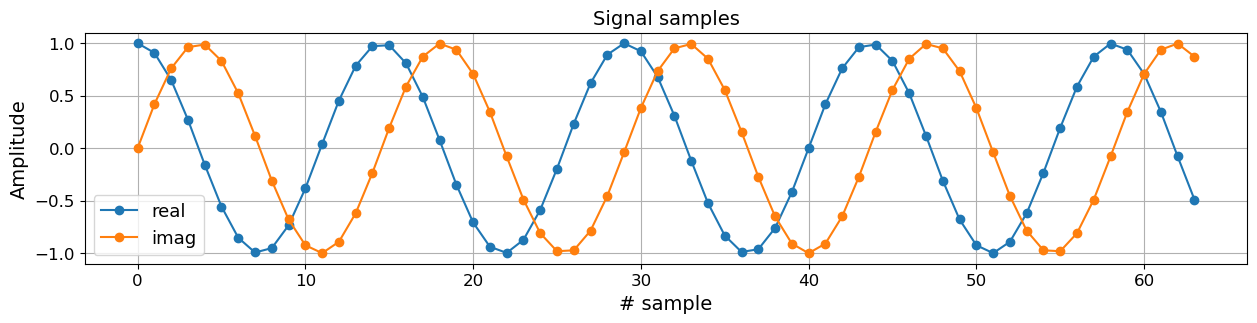

In [21]:
N = 64
k = 4.4

n = torch.arange(N)
phi_0 = 0

x_n = torch.exp(2j*(torch.pi*k*n/N + phi_0))

plot_re_im(x_n)

(-0.5999999999999996, 9.4)

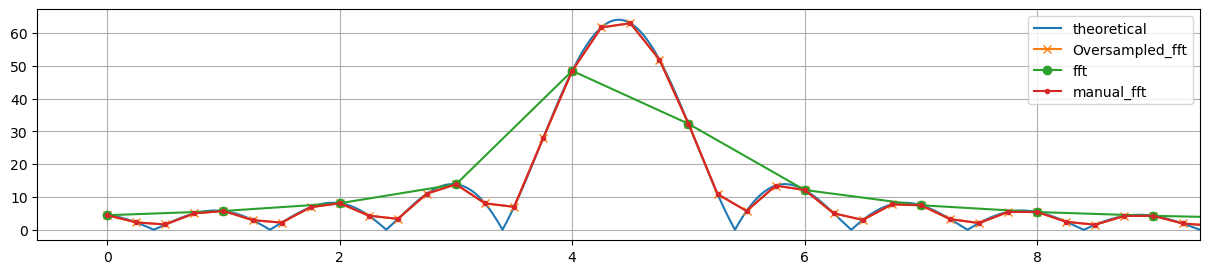

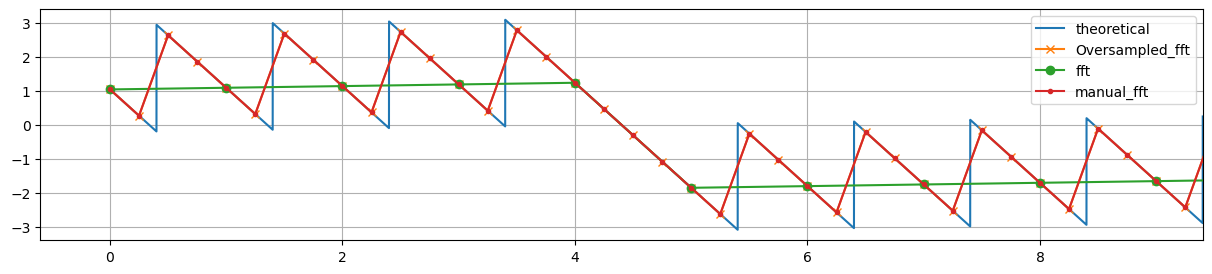

In [26]:
M = 256
m = torch.arange(0, N)
mo = torch.linspace(0, N, M+1)[:-1]
mx = torch.linspace(0, N, int(1e5)+1)[:-1]

X_m_theor = theretical_response(k, mx, N, phi_0)
X_m_fft = fft(x_n)
X_mo_fft = fft(x_n, n = M)

nm = torch.outer(n, mo)
F = torch.exp(-2j * pi/N * nm )
X_mo_mfft = x_n.type(torch.complex64) @ F


plot_am_spectrum(theoretical = (mx, X_m_theor),
                 Oversampled_fft = (mo, X_mo_fft),
                 fft = (m, X_m_fft),
                 manual_fft = (mo, X_mo_mfft))
samp = 5 
plt.xlim([k - samp, k + samp])


plot_phi_spectrum(theoretical = (mx, X_m_theor),
                 Oversampled_fft = (mo, X_mo_fft),
                 fft = (m, X_m_fft),
                 manual_fft = (mo, X_mo_mfft))
samp = 5 
plt.xlim([k - samp, k + samp])


